LOJİSTİK REGRESYON

- Amaç sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.
- bağımlı değişken kategoriktir.
- adını bağımlı değişkene uygulanan "logit" dönüşümünden alır.
- daha esnek bir kullanabilirliği vardır.
- bağımlı değişkenin 1 olarak tanımlanan değerinin gerçekleşme olasılığı hesaplanır.bundan dolayı bağımlı değişkenin alacağı değer ile ilgilenmez.
- üretilen değerler 0-1 arasında olur.

In [4]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

LOJİSTİK REGRESYON
- MODEL

In [5]:
diabetes = pd.read_csv("/Users/mehmetsenel/Desktop/Makine-Ogrenmesi/datasets/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

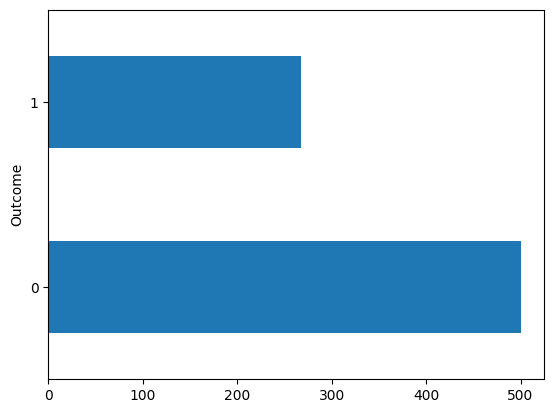

In [8]:
df["Outcome"].value_counts().plot.barh();

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [11]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                 0.05922
Time:                        17:59:13   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [12]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [13]:
loj_model.intercept_

array([-5.89224552])

In [14]:
loj_model.coef_

array([[ 1.17046433e-01,  2.83909936e-02, -1.68877934e-02,
         7.60028703e-04, -6.42581842e-04,  5.97827092e-02,
         6.75480820e-01,  7.24727903e-03]])

- TAHMİN VE MODEL TUNİNG

In [15]:
y_pred = loj_model.predict(X)

In [16]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [17]:
accuracy_score(y,y_pred)

0.7747395833333334

In [18]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [19]:
loj_model.predict(X)[0:5]

array([1, 0, 1, 0, 1])

In [20]:
loj_model.predict_proba(X)[0:10]

array([[0.35042549, 0.64957451],
       [0.91702069, 0.08297931],
       [0.22484841, 0.77515159],
       [0.92136394, 0.07863606],
       [0.167737  , 0.832263  ],
       [0.79894722, 0.20105278],
       [0.88016696, 0.11983304],
       [0.27804131, 0.72195869],
       [0.32033966, 0.67966034],
       [0.92273945, 0.07726055]])

In [21]:
y_probs = loj.predict_proba(X)
y_probs = y_probs[:,1]

In [22]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [23]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

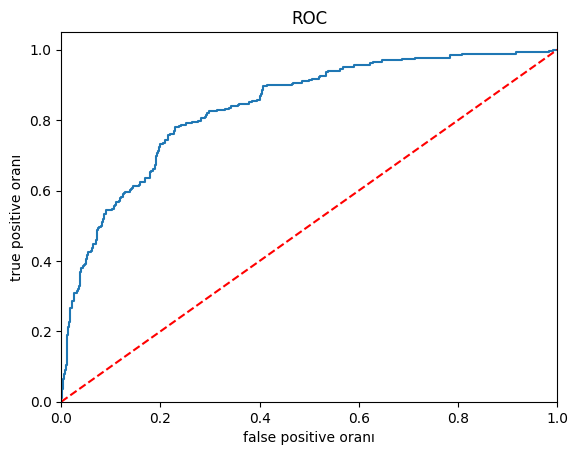

In [24]:
logit_roc_auc = roc_auc_score(y,loj_model.predict(X))
fpr,tpr,thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label ='AUC (area =%0.3f)' % logit_roc_auc )
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive oranı')
plt.ylabel('true positive oranı')
plt.title('ROC')
plt.show()

In [25]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [27]:
accuracy_score(y_test,loj_model.predict(X_test))

0.7447916666666666

In [28]:
cross_val_score(loj_model, X_test,y_test, cv=10).mean()

0.7397368421052632

NAİVE BAYES

- olasılık temelli modelleme tekniğidir.
- amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.
- genel oalrak e ticaret sitelerinde çoklu yapılarda sıkça karşılaşılır.


In [29]:
df = diabetes.copy()
df = df.dropna() 
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb = GaussianNB()

In [32]:
nb_model = nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [33]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [34]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [35]:
y_pred = nb_model.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [37]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()

0.775

K-EN YAKIN KOMŞU (KNN)

- tahminlerin gözlem benzerliğine göre yapılır.
- komşu sayısı belirlenir.
- öklid ya da benzeri uzaklık hesabı ile uzaklık hesaplanır.
- uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç
- sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver.

In [38]:
df = diabetes.copy()
df = df.dropna() 
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [39]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [40]:
y_pred = knn_model.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [43]:
knn_params = {"n_neighbors" : np.arange(1,50)}

In [44]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [45]:
knn_cv.best_score_

0.748637316561845

In [46]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train,y_train)

In [47]:
knn_tuned.score(X_test,y_test)

0.7316017316017316

In [48]:
y_pred = knn_tuned.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)

0.7316017316017316

DESTEK VEKTÖR MAKİNELERİ (SVM)

- amaç iki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulmaktır.
- 

In [50]:
df = diabetes.copy()
df = df.dropna() 
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [51]:
svm_model = SVC(kernel="linear").fit(X_train,y_train)

In [52]:
svm_model


SVC(kernel='linear')

In [53]:
y_pred = svm_model.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [55]:
svc_params = {"C":np.arange(1,10)}
svc = SVC(kernel="linear")
svc_cv_model = GridSearchCV(svc,svc_params,cv=10,n_jobs=-1,verbose=2)
svc_cv_model.fit(X_train,y_train)


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[CV] END ................................................C=1; total time=   3.2s
[CV] END ................................................C=1; total time=   3.4s
[CV] END ................................................C=1; total time=   4.7s
[CV] END ................................................C=1; total time=   5.1s
[CV] END ................................................C=1; total time=   5.8s
[CV] END ................................................C=1; total time=   5.8s
[CV] END ................................................C=1; total time=   6.3s
[CV] END ................................................C=1; total time=   4.9s
[CV] END ................................................C=1; total time=   6.0s
[CV] END ................................................C=1; total time=  10.3s
[CV] END ................................................C=2; total time=   6.3s
[CV] END ................................................C=2; total time=  10.1s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [56]:
svc_cv_model.best_params_

{'C': 1}

In [57]:
svc_tuned = SVC(kernel="linear",C=1).fit(X_train,y_train)

In [58]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

YAPAY SİNİR AĞLARI 


- insan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon prbolemleri için kullanılabilen kuvetli makine öğrenmesi algoritmalarından birisidir.
-  girdiler -> ağırlıkları -> toplama fonk. -> aktivasyon fonk. -> çıktılar
-

In [59]:
df = diabetes.copy()
df = df.dropna() 
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler


In [61]:
scaler = StandardScaler()

In [62]:
scaler.fit(X_train)

StandardScaler()

In [63]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
mlpc = MLPClassifier().fit(X_train_scaled,y_train)

In [67]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7316017316017316

In [68]:
#model tuning
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

so

In [69]:
mlpc_params = {"alpha": [0.1,0.01,0.02,0.005,0.0001,0.00001],
               "hidden_layer_sizes":[(10,10,10),(100,100,100),(100,100),(3,5),(5,3)],
               "solver" :["lbfgs","adam","sgd"],
               "activation":["relu","logistic"]}

In [70]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Fram

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hid

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidde

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Fram

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Fram

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Fram

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Fram

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   4.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   4.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   4.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   4.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   4.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   4.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Fram

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Fram

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   4.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   4.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   4.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   4.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   4.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Fram

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=r

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=relu, alpha=0.0001,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Fram

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END ac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=relu, alpha=1e-05, hidden_la

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   2.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   1.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Fram

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solv

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.7s
[CV] END activation=logis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] EN

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[C

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END ac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; t

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs;

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hi

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.4s[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.6s

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.8s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.4s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.7s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.7s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.7s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sg

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; to

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END ac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activatio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time= 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   3.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   2.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solve

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Fram

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solv

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alph

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Fram

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   5.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[C

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   4.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   2.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.4s
[CV] END activation=log

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   2.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hid

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; t

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [71]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.02,
 'hidden_layer_sizes': (100, 100),
 'solver': 'sgd'}

In [74]:
mlpc_tuned = MLPClassifier(activation="relu",alpha=0.02,hidden_layer_sizes=(100,100),solver="sgd")

In [75]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(alpha=0.02, hidden_layer_sizes=(100, 100), solver='sgd')

In [76]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7316017316017316

In [77]:
mlpc_tuned = MLPClassifier(activation="logistic",alpha=0.1,hidden_layer_sizes=(100,100,100),solver="adam")

In [78]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [79]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7316017316017316

Classification and Regression Tress(CART)

- amaç veri seti içerisindeki yapıları basit karar yapılarına dönüştürmektir.
- heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.


Model-Tahmin 

In [101]:
df = diabetes.copy()
df = df.dropna() 
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
#X = df["Pregnancies"]
X= pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train,y_train)

In [110]:
cart_model

DecisionTreeClassifier()

In [111]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[6] <= 0.39149999618530273 else 1) if x[5] <=
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[6] <= 0.32649999111890793 else 0) if x[5
    ] <= 30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if
    x[5] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 
    32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else 
    (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else (1 if x[3] <= 16.5 else
    0) if x[1] <= 135.0 else 0) if x[2] <= 94.0 else 1 if x[0] <= 9.0 else 
    0) if x[5] <= 26.

In [112]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)


0.6796536796536796

In [113]:
cart_grid = {"max_depth" : list(range(1,10)),
             "min_samples_split": list(range(2,50))
             }

In [116]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid,cv=10,n_jobs=-1,verbose=2)
cart_cv_model = cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min

In [117]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 19}

In [118]:
cart = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=19)
cart_tuned = cart.fit(X_train,y_train)

In [119]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

RANDOM FOREST SINIFLANDIRMA

- temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- değişkenler random subspace ile seçilir.
- karar ağacının her bir düğümünde en iyi dallara ayırıcı değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
- her düğüm noktasından rastgele değişken seçimi yapılır
- nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir.

In [152]:
df = diabetes.copy()
df = df.dropna() 
y = df["Outcome"]
X = df.drop(['Outcome'],axis=1)
#X = df["Pregnancies"]
X= pd.DataFrame(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [155]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

In [156]:
#model tuning
rf_params = {"max_depth":[2,3,5,8,10],
             "max_features" : [2,5,8],
             "n_estimators" : [10,500,1000],
             "min_samples_split": [2,5,10]}


In [157]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)

In [158]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; tota

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10],
                         'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [162]:
rf_tuned = RandomForestClassifier(max_depth=8,max_features=5,min_samples_split=10,n_estimators=1000)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=10,
                       n_estimators=1000)

In [163]:
y_pred = rf_tuned.predict(X_test)

In [164]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [165]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                          index=X_train.columns)

Text(0.5, 0, 'Değişken önem düzeyleri')

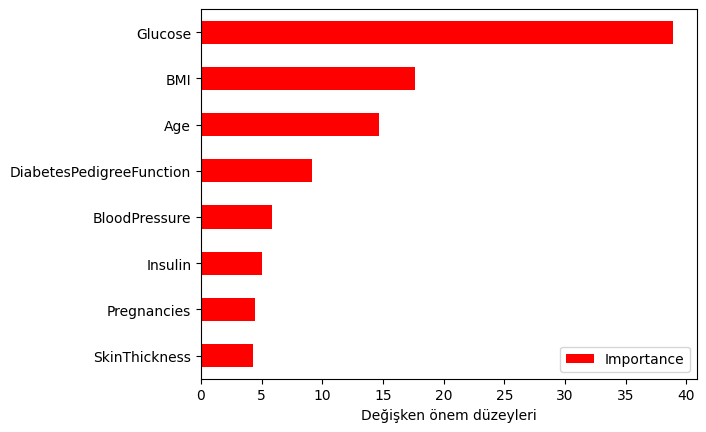

In [166]:
Importance.sort_values(by = "Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",color="r")
plt.xlabel("Değişken önem düzeyleri")